In [2]:
#discuss violin plot with Gordon
#should I include Tacoma and reprice at $13.9k? Description in name column is clear evidence of typo.

# Craigslist Used Items Analysis

This is my first project related to web scraping and data analytics/visualization. I've always been interested in the second-hand market.  There are many second-hand stores here in the Asheville area. I was curious to explore what was being sold on the most prominent site to post used goods, Craigslist. I used the Scrapy package to scrape the first page of items available close to where I live. This is simple introduction project and I may build this out in more depth in the future as a hobby. For now, this notebook provides a quick snapshot of what is available in the area for the day I scraped CL.

Questions I want to answer:

What the most common item types being sold around that area?  

What items sell for the most money?

What can I get for free?

How much money should I expect to bring with me to do some treasure-hunting around Asheville and neighboring towns?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#display all lines as ouput
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

raw = pd.read_csv("avl_used_goods.csv")

raw.head()

,date,location,name,price
0,Apr 25,(GarageTRS),2015 Harley Davidson Softail Slim with Warrent...,$12899
1,Apr 25,(~ Hummer_ H3_ Luxury),2008 *Hummer* *H3* Luxury IN HOUSE FINANCE FRE...,$14950
2,Apr 25,(GarageTRS),MUST SELL!! NEED SPACE! 2013 Polaris RZR 800S LE,$9499
3,Apr 25,(GarageTRS),2015 Hyosung Aquila GV250 PERFECT Starter Bike!,$3499
4,Apr 25,(Greenville),02 Ford Excursion v10,$2500


I'd prefer to simplify the dataframe so the index is the date column; this is just personal preference.  Also, I want to take a look at each remaining column and the data-types they are.

In [5]:
#adjust index of dataframe
postings = raw.rename(index=raw['date'])
postings.index[:5]

#explain why I changed first column to index.

Index(['Apr 25', 'Apr 25', 'Apr 25', 'Apr 25', 'Apr 25'], dtype='object')

In [6]:
del postings['date']

In [7]:
postings.dtypes #object data type is essentially string type.
postings.head()

location    object
name        object
price       object
dtype: object

,location,name,price
Apr 25,(GarageTRS),2015 Harley Davidson Softail Slim with Warrent...,$12899
Apr 25,(~ Hummer_ H3_ Luxury),2008 *Hummer* *H3* Luxury IN HOUSE FINANCE FRE...,$14950
Apr 25,(GarageTRS),MUST SELL!! NEED SPACE! 2013 Polaris RZR 800S LE,$9499
Apr 25,(GarageTRS),2015 Hyosung Aquila GV250 PERFECT Starter Bike!,$3499
Apr 25,(Greenville),02 Ford Excursion v10,$2500


Before I begin I want to get an idea of how many items I'm starting off with to parse through.

In [8]:
len(postings)
postings.head()

98

,location,name,price
Apr 25,(GarageTRS),2015 Harley Davidson Softail Slim with Warrent...,$12899
Apr 25,(~ Hummer_ H3_ Luxury),2008 *Hummer* *H3* Luxury IN HOUSE FINANCE FRE...,$14950
Apr 25,(GarageTRS),MUST SELL!! NEED SPACE! 2013 Polaris RZR 800S LE,$9499
Apr 25,(GarageTRS),2015 Hyosung Aquila GV250 PERFECT Starter Bike!,$3499
Apr 25,(Greenville),02 Ford Excursion v10,$2500


The price column will need to be converted to float-type so that numerical analysis can be performed on the items.

In [9]:
#adjust price column to float type and sort values descending
postings['price'] = postings['price'].replace('[\$]','', regex=True ).astype(float)
postings = postings.sort_values('price', ascending=False)
postings.dtypes
postings.head()

location     object
name         object
price       float64
dtype: object

,location,name,price
Apr 25,(downtown Asheville),"2009 Toyota Tacoma, 4x4 102,000, ext. cab $13,900",139000.0
Apr 25,(2015 Mercedes-Benz Sprinter Vans),2015 Mercedes-Benz Sprinter Vans Van Sprinter ...,38189.0
Apr 25,(marion),1968 Camaro,26500.0
Apr 25,(Knoxville),07 cummins,20000.0
Apr 25,(~ Hummer_ H3_ Luxury),2008 *Hummer* *H3* Luxury IN HOUSE FINANCE FRE...,14950.0


The location column will need to be normalized so make analysis more efficient.  I will need to remove all erroenous characters and capitalize all remaining characters.

In [10]:
# remove all non-letter characters from location column using regex
postings['location'].replace(['\(', ',', '~', '_' ,'\)'], '', regex=True, inplace=True)
postings.head()

,location,name,price
Apr 25,downtown Asheville,"2009 Toyota Tacoma, 4x4 102,000, ext. cab $13,900",139000.0
Apr 25,2015 Mercedes-Benz Sprinter Vans,2015 Mercedes-Benz Sprinter Vans Van Sprinter ...,38189.0
Apr 25,marion,1968 Camaro,26500.0
Apr 25,Knoxville,07 cummins,20000.0
Apr 25,Hummer H3 Luxury,2008 *Hummer* *H3* Luxury IN HOUSE FINANCE FRE...,14950.0


In [11]:
postings['location'] = postings['location'].apply(lambda x: x.upper())#upper-case locations
postings = postings.sort_values(['price'], ascending=False)
postings.head()

,location,name,price
Apr 25,DOWNTOWN ASHEVILLE,"2009 Toyota Tacoma, 4x4 102,000, ext. cab $13,900",139000.0
Apr 25,2015 MERCEDES-BENZ SPRINTER VANS,2015 Mercedes-Benz Sprinter Vans Van Sprinter ...,38189.0
Apr 25,MARION,1968 Camaro,26500.0
Apr 25,KNOXVILLE,07 cummins,20000.0
Apr 25,HUMMER H3 LUXURY,2008 *Hummer* *H3* Luxury IN HOUSE FINANCE FRE...,14950.0


It appears there are a fair amount of erroenous locations in the dataframe.  To perform accurate analysis and visualization on items, I will need to consolidate and remove some of these locations.

In [12]:
len(postings.location.unique())
postings.location.unique()

36

array([' DOWNTOWN ASHEVILLE', ' 2015 MERCEDES-BENZ SPRINTER VANS',
       ' MARION', ' KNOXVILLE', '  HUMMER H3 LUXURY', ' GARAGETRS',
       ' AMERICAN AUTO SALES', ' ASHEVILLE', ' HENDERSONVILLE',
       ' GREENVILLE', ' HAYWOOD', ' FOREST CITY', ' RUTHERFORDTON',
       ' NORTH ASHEVILLE', ' SWANNANOA', ' WEAVERVILLE', ' ETOWAH',
       ' WAYNESVILLE NC', ' 224 SOUTH GROVE STREET UNIT L', ' WNC',
       ' EAST ASHEVILLE', ' SPARTANBURG SC', ' CANDLER', ' FRANKLIN NC',
       ' FLAT ROCK', ' OLD FORT', ' BREVARD NC', ' ASHEVILLE NC',
       ' WEAVERVILLE N C', ' BREVARDNC', ' ASHEVILLE N C',
       ' ASHEVILLE NEAR DOWNTOWN', ' NEAR ASHEVILLE AIRPORT',
       ' WAYNESVILLE', ' DELIVERED', ' LEICESTER NC'], dtype=object)

In [13]:
postings.loc[postings.location.str.contains('AMERICAN AUTO SALES'),'location'] = 'ARDEN'
postings.loc[postings.location.str.contains('ASHEVILLE'),'location'] = 'ASHEVILLE'
postings.loc[postings.location.str.contains('GARAGETRS'),'location'] = 'ASHEVILLE' #dealer in Asheville
postings.loc[postings.location.str.contains('BREVARD'),'location'] = 'BREVARD'
postings.loc[postings.location.str.contains('WAYNESVILLE'),'location'] = 'WAYNESVILLE'
postings.loc[postings.location.str.contains('WEAVERVILLE'),'location'] = 'WEAVERVILLE'
postings = postings[~postings.location.str.contains('KNOXVILLE')]#remove knoxville; distance too far and only one item.
postings = postings[~postings.location.str.contains('SPARTANBURG')] #remove spartanburg; distance too far and only one item.
postings = postings[~postings.location.str.contains('HUMMER H3 LUXURY')] #removed because location isn't provided; only one item.
postings = postings[~postings.location.str.contains('2015 MERCEDES-BENZ SPRINTER VANS')] #removed because location isn't provided; only one item.
postings = postings[~postings.location.str.contains('224 SOUTH GROVE STREET UNIT L')] #removed because irrelevant; room for rent, not item for sale.

In [14]:
len(postings.location.unique())
postings.location.unique()

20

array(['ASHEVILLE', ' MARION', 'ARDEN', ' HENDERSONVILLE', ' GREENVILLE',
       ' HAYWOOD', ' FOREST CITY', ' RUTHERFORDTON', ' SWANNANOA',
       'WEAVERVILLE', ' ETOWAH', 'WAYNESVILLE', ' WNC', ' CANDLER',
       ' FRANKLIN NC', ' FLAT ROCK', ' OLD FORT', 'BREVARD', ' DELIVERED',
       ' LEICESTER NC'], dtype=object)

Now that the dataframe has been cleaned up a bit, I want to start to get a feel for the dispersion of prices of the items in the area.

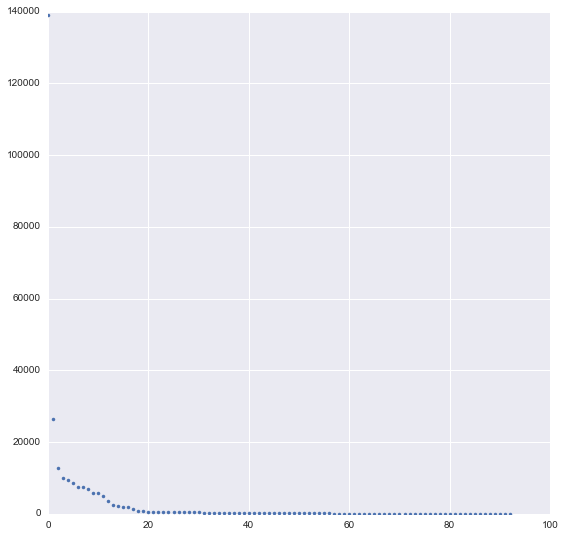

In [15]:
plt.figure(figsize=(9,9))
plt.plot(postings.price.values, '.')
# plt.figure(figsize=(9,9))
plt.show();

In [16]:
len(postings.loc[postings.price < 1000, :])
len(postings.loc[postings.price >= 1000, :])

75

18

In [17]:
postings.head(10)
postings.tail(10)

,location,name,price
Apr 25,ASHEVILLE,"2009 Toyota Tacoma, 4x4 102,000, ext. cab $13,900",139000.0
Apr 25,MARION,1968 Camaro,26500.0
Apr 25,ASHEVILLE,2015 Harley Davidson Softail Slim with Warrent...,12899.0
Apr 25,ARDEN,2006 SUBARU BAJA TURBO,9900.0
Apr 25,ASHEVILLE,MUST SELL!! NEED SPACE! 2013 Polaris RZR 800S LE,9499.0
Apr 25,ASHEVILLE,2007 Ford Mustang - Excellent Condition,8500.0
Apr 25,HENDERSONVILLE,Ford explorer,7500.0
Apr 25,GREENVILLE,2017 ktm 250sx BRAND NEW NEVER CRANKED,7500.0
Apr 25,HAYWOOD,98 Jeep Wrangler,7000.0
Apr 25,ARDEN,2003 HONDA ELEMENT AWD,5900.0


,location,name,price
Apr 25,ASHEVILLE,PT 609 Pro Mag.,12.0
Apr 25,ASHEVILLE,Brand New Verbatim pack of 30 DVD-r,10.0
Apr 25,BREVARD,2 RCA Speaker,10.0
Apr 25,WAYNESVILLE,Car Batteries $5 for bad $10 for good,10.0
Apr 25,DELIVERED,Premium Horse Hay! 2017 Production,7.0
Apr 25,LEICESTER NC,All Man Magazine - 1959,3.0
Apr 25,MARION,1994 Honda Civic 2 Dr Coupe,2.0
Apr 25,WAYNESVILLE,2008 Kia Sedona parts,1.0
Apr 25,WAYNESVILLE,2006 Chrysler 300 parts,1.0
Apr 25,ASHEVILLE,"WTB Vintage Mandolins, Violins, Guitars",1.0


It appears the most expensive items in the area are motor vehicles.  A fair amount of the least expensive items are vehicle related as well.  It also appears that there is one item that is abnormally high.  It will be best to remove this anamolous item so that it doesn't skew the data.

Let's also take a look at items grouped by their locations.  I'm interested in finding out how much potential value is available per each location around where I live. 

In [18]:
postings[postings.price==postings.price.max()] #Thats an expensive Tacoma!! Probably just a typo, but removing to avoid assumptions.
postings = postings.loc[~postings.name.str.contains('2009 Toyota Tacoma, 4x4 102,000'),['location', 'name', 'price']] 

#group by location; get the sum of each location
postings.groupby(['location']).agg(['sum']).loc[:,'price']


,location,name,price
Apr 25,ASHEVILLE,"2009 Toyota Tacoma, 4x4 102,000, ext. cab $13,900",139000.0


,sum
location,
CANDLER,305.0
DELIVERED,7.0
ETOWAH,500.0
FLAT ROCK,175.0
FOREST CITY,2000.0
FRANKLIN NC,200.0
GREENVILLE,10000.0
HAYWOOD,7000.0
HENDERSONVILLE,8639.0


Now that the anamolous item is removed, let's take a look at the most expensive item avaiable in the area is.  We'll also visualize each location via a boxplot.

In [19]:
postings.loc[postings.price == postings.price.max(),]

,location,name,price
Apr 25,MARION,1968 Camaro,26500.0


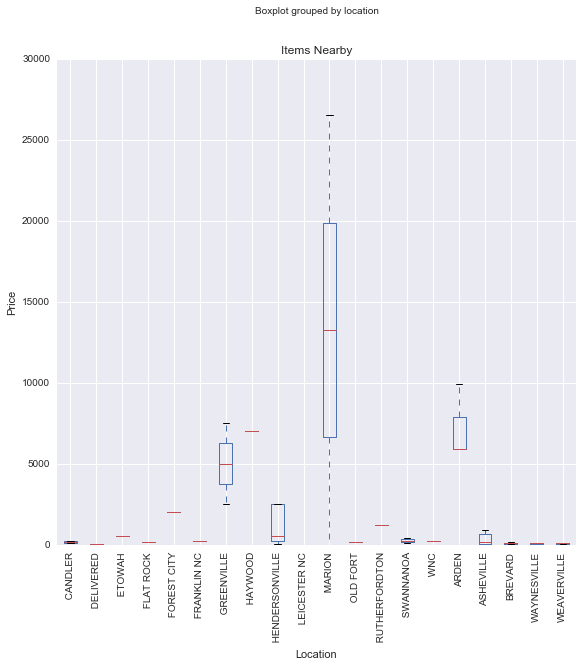

In [20]:
#update df to remove name column; necessary for clean boxplot visualization.
postings_bp = postings.loc[:, ['location', 'price']]

#create a boxplot; adjust x-axis labels so they are visible. specify labels and title.  
postings_bp.boxplot(column='price', by='location',figsize=(9,9))
plt.xticks(rotation='vertical')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Items Nearby')
plt.show();

The boxplot still appears to be cluttered with anomalous items. I'll need to clean this up and replot the items.
But first, let's take a closer look at the vehicles for sale in the area to see how they are affecting the dataset.

In [21]:
# vehicles are skewing boxplot too much; all rows at or above 1.8k appear to be motor vehicles. 
motor_vehicles = postings.loc[postings.price >= 1800.0, :]
motor_vehicles

,location,name,price
Apr 25,MARION,1968 Camaro,26500.0
Apr 25,ASHEVILLE,2015 Harley Davidson Softail Slim with Warrent...,12899.0
Apr 25,ARDEN,2006 SUBARU BAJA TURBO,9900.0
Apr 25,ASHEVILLE,MUST SELL!! NEED SPACE! 2013 Polaris RZR 800S LE,9499.0
Apr 25,ASHEVILLE,2007 Ford Mustang - Excellent Condition,8500.0
Apr 25,HENDERSONVILLE,Ford explorer,7500.0
Apr 25,GREENVILLE,2017 ktm 250sx BRAND NEW NEVER CRANKED,7500.0
Apr 25,HAYWOOD,98 Jeep Wrangler,7000.0
Apr 25,ARDEN,2003 HONDA ELEMENT AWD,5900.0
Apr 25,ARDEN,2006 HONDA ACCORD,5900.0


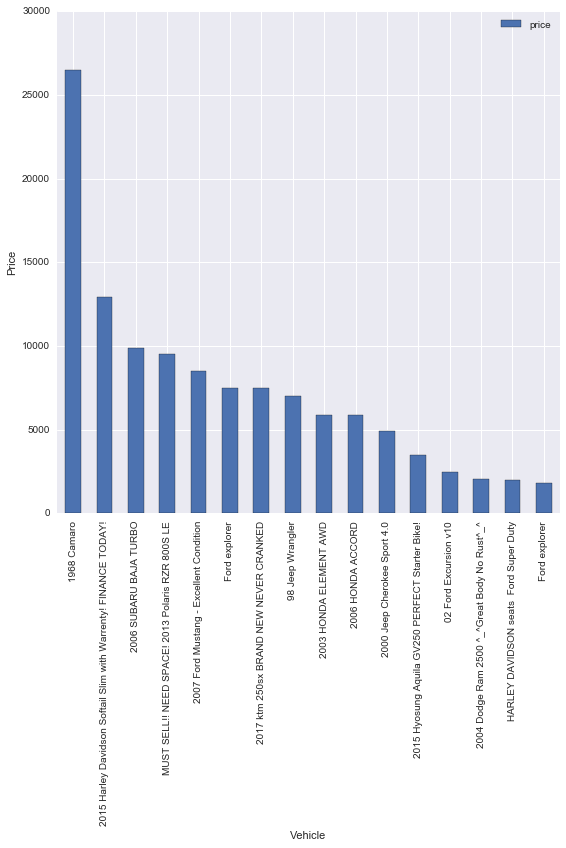

In [38]:
motor_vehicles.plot.bar('name', 'price', figsize=(9,9))
plt.ylabel("Price")
plt.xlabel("Vehicle")
plt.show();

Now that we've taken a closer look at the vehicles in the area, lets remove them and examine the remaining items.

In [23]:
#new dataframe created to remove motor vehicles
non_mv = postings.loc[postings.price < 1800.0, :]
non_mv.describe()

,price
count,76.000000
mean,188.131579
std,238.855401
min,1.000000
25%,28.000000
50%,89.500000
75%,250.000000
max,1200.000000


In [24]:
non_mv.sort_values(by='price', ascending=False).head(10)
non_mv.sort_values(by='price', ascending=False).tail(10)

,location,name,price
Apr 25,RUTHERFORDTON,Vintage Porcelain True Value Sign,1200.0
Apr 25,ASHEVILLE,Canon 5D MK II Body - Low Shutter Count,900.0
Apr 25,HENDERSONVILLE,Wedding Dress,800.0
Apr 25,ASHEVILLE,Antique Oak Cabinet/Bookcase,625.0
Apr 25,ASHEVILLE,Mission Oak Antique Cabinet/Bookcase,625.0
Apr 25,ASHEVILLE,Mission Oak Cabinet/Bookcase,625.0
Apr 25,SWANNANOA,"27"" iMac (Late 2009)",600.0
Apr 25,WEAVERVILLE,Canon EF 17-35mm f/2.8 L USM Lens -Exc,525.0
Apr 25,WAYNESVILLE,Large 6' - 8' Solid Wood Dining Table with 8 c...,500.0
Apr 25,ASHEVILLE,Moe's Home Collection Colvin Sideboard in Natural,500.0


,location,name,price
Apr 25,ASHEVILLE,PT 609 Pro Mag.,12.0
Apr 25,WAYNESVILLE,Car Batteries $5 for bad $10 for good,10.0
Apr 25,ASHEVILLE,Brand New Verbatim pack of 30 DVD-r,10.0
Apr 25,BREVARD,2 RCA Speaker,10.0
Apr 25,DELIVERED,Premium Horse Hay! 2017 Production,7.0
Apr 25,LEICESTER NC,All Man Magazine - 1959,3.0
Apr 25,MARION,1994 Honda Civic 2 Dr Coupe,2.0
Apr 25,WAYNESVILLE,2008 Kia Sedona parts,1.0
Apr 25,WAYNESVILLE,2006 Chrysler 300 parts,1.0
Apr 25,ASHEVILLE,"WTB Vintage Mandolins, Violins, Guitars",1.0


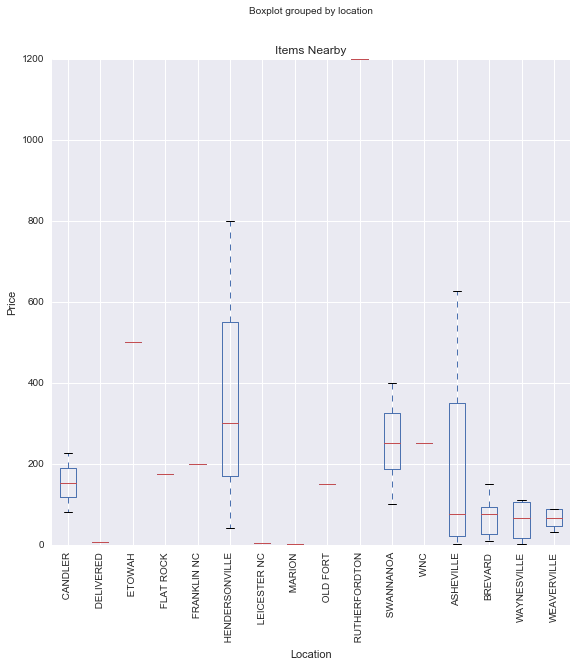

In [25]:
non_mv_bp = non_mv.loc[:, ['location', 'price']]#prepping df for boxplot, removed name column

non_mv_bp.boxplot(column='price', by='location', figsize=(9,9))
plt.xticks(rotation='vertical')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Items Nearby')
plt.show();

It appears that the anomalous locations are still cluttering the boxplot.  Let's take a look at what those items are and clean up the dataset to refine the visualization.

In [26]:
non_mv.location.unique()

array([' RUTHERFORDTON', 'ASHEVILLE', ' HENDERSONVILLE', ' SWANNANOA',
       'WEAVERVILLE', ' ETOWAH', 'WAYNESVILLE', ' WNC', ' CANDLER',
       ' FRANKLIN NC', ' FLAT ROCK', ' OLD FORT', 'BREVARD', ' DELIVERED',
       ' LEICESTER NC', ' MARION'], dtype=object)

In [27]:
postings[postings.location.str.contains('DELIVERED')]
postings[postings.location.str.contains('ETOWAH')]
postings[postings.location.str.contains('FLAT ROCK')]
postings[postings.location.str.contains('FOREST CITY')]
postings[postings.location.str.contains('FRANKLIN')]
postings[postings.location.str.contains('LEICESTER')]
postings[postings.location.str.contains('MARION')]
postings[postings.location.str.contains('OLD FORT')]
postings[postings.location.str.contains('RUTHERFORDTON')]
postings[postings.location.str.contains('WNC')]

,location,name,price
Apr 25,DELIVERED,Premium Horse Hay! 2017 Production,7.0


,location,name,price
Apr 25,ETOWAH,Propane fireplace/stove and mantle,500.0


,location,name,price
Apr 25,FLAT ROCK,WHEEL DOLLIES (SET OF 4),175.0


,location,name,price
Apr 25,FOREST CITY,HARLEY DAVIDSON seats Ford Super Duty,2000.0


,location,name,price
Apr 25,FRANKLIN NC,Complete 305 Chevy Engine,200.0


,location,name,price
Apr 25,LEICESTER NC,All Man Magazine - 1959,3.0


,location,name,price
Apr 25,MARION,1968 Camaro,26500.0
Apr 25,MARION,1994 Honda Civic 2 Dr Coupe,2.0


,location,name,price
Apr 25,OLD FORT,Marvin Bailey Face Jug,150.0
Apr 25,OLD FORT,Maple Book Cases,150.0


,location,name,price
Apr 25,RUTHERFORDTON,Vintage Porcelain True Value Sign,1200.0


,location,name,price
Apr 25,WNC,"AKAI Tuner/Amp ,25 WATT ,and all accessories",250.0


In [28]:
#Removing all locations with 2 or less items.
counts = non_mv.location.value_counts()
loc_gt2 = counts[counts > 2]
loc_gt2 

popular_locations = non_mv[non_mv.location.isin(loc_gt2.keys())]

popular_locations[popular_locations.price == popular_locations.price.max()]

ASHEVILLE          27
BREVARD            11
WAYNESVILLE        10
 SWANNANOA          8
WEAVERVILLE         5
 HENDERSONVILLE     3
Name: location, dtype: int64

,location,name,price
Apr 25,ASHEVILLE,Canon 5D MK II Body - Low Shutter Count,900.0


Now we can take a deeper look at the items only located in the primary locations.

In [29]:
popular_locations.describe()

,price
count,64.000000
mean,177.437500
std,219.255803
min,1.000000
25%,28.000000
50%,82.000000
75%,250.000000
max,900.000000


I'm concerned that there may be duplicate items.  Let's take a look; if there are some we'll remove them.

In [30]:
popular_locations.loc[popular_locations.duplicated(),:]#extracting out all the duplicates
popular_locations.drop_duplicates(inplace=True)
popular_locations = popular_locations[~popular_locations.name.str.contains('Mission Oak')]#removing this item that shows up 3 times with different names

,location,name,price
Apr 25,ASHEVILLE,Moe's Home Collection Colvin Sideboard in Natural,500.0
Apr 25,ASHEVILLE,Cardinal Health NPWT Black Foam Dressing Kit X...,79.0
Apr 25,ASHEVILLE,PT 609 Pro Mag.,12.0


C:\Users\Keenan\Anaconda3\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [31]:
popular_locations.head()
popular_locations.tail()

,location,name,price
Apr 25,ASHEVILLE,Canon 5D MK II Body - Low Shutter Count,900.0
Apr 25,HENDERSONVILLE,Wedding Dress,800.0
Apr 25,ASHEVILLE,Antique Oak Cabinet/Bookcase,625.0
Apr 25,SWANNANOA,"27"" iMac (Late 2009)",600.0
Apr 25,WEAVERVILLE,Canon EF 17-35mm f/2.8 L USM Lens -Exc,525.0


,location,name,price
Apr 25,BREVARD,2 RCA Speaker,10.0
Apr 25,WAYNESVILLE,Car Batteries $5 for bad $10 for good,10.0
Apr 25,WAYNESVILLE,2008 Kia Sedona parts,1.0
Apr 25,WAYNESVILLE,2006 Chrysler 300 parts,1.0
Apr 25,ASHEVILLE,"WTB Vintage Mandolins, Violins, Guitars",1.0


Now that we've extracted and removed the anamolous locations and erroneous items from the dataset, let's take a deeper dive into each location and the items available there.

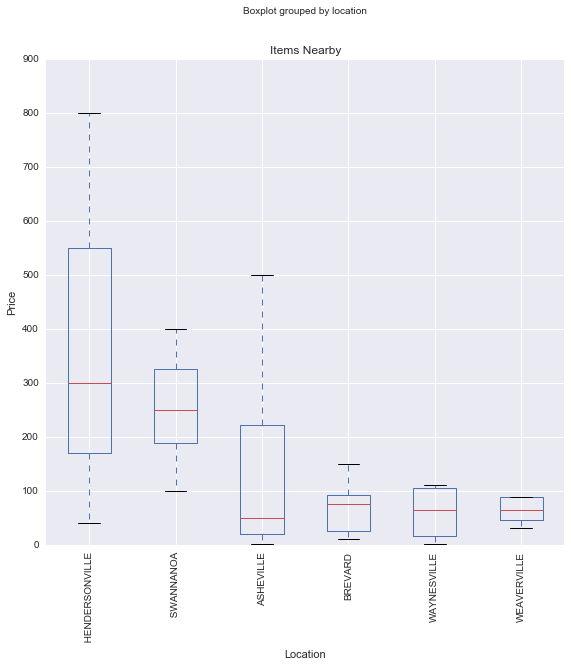

In [32]:
popular_postings_bp = popular_locations.loc[:, ['location', 'price']]

#create a boxplot; specify labels and title.  
popular_postings_bp.boxplot(column='price', by='location', figsize=(9,9))
plt.xticks(rotation='vertical')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Items Nearby')
plt.show();

In [33]:
popular_locations.groupby(['location']).describe()

popular_locations.groupby(['location']).agg(['sum']).loc[:,'price']

popular_locations.sort_values(by='price', ascending=False).groupby('location').first()#most expensive item in each location

price
location                         
 HENDERSONVILLE count    3.000000
                mean   379.666667
                std    386.368132
                min     40.000000
                25%    169.500000
                50%    299.000000
                75%    549.500000
                max    800.000000
 SWANNANOA      count    8.000000
                mean   281.250000
                std    157.972647
                min    100.000000
                25%    187.500000
                50%    250.000000
                75%    325.000000
                max    600.000000
ASHEVILLE       count   22.000000
                mean   166.590909
                std    239.687229
                min      1.000000
                25%     20.000000
                50%     49.500000
                75%    221.250000
                max    900.000000
BREVARD         count   11.000000
                mean    65.363636
                std     45.149247
                min     10.000000
                25%     25.000000
                50%     75.000000
                75%     92.500000
                max    150.000000
WAYNESVILLE     count   10.000000
                mean    98.700000
                std    147.143203
                min      1.000000
                25%     16.250000
                50%     65.000000
                75%    105.000000
                max    500.000000
WEAVERVILLE     count    5.000000
                mean   151.000000
                std    210.227258
                min     30.000000
                25%     46.000000
                50%     65.000000
                75%     89.000000
                max    525.000000

,sum
location,
HENDERSONVILLE,1139.0
SWANNANOA,2250.0
ASHEVILLE,3665.0
BREVARD,719.0
WAYNESVILLE,987.0
WEAVERVILLE,755.0


,name,price
location,,
HENDERSONVILLE,Wedding Dress,800.0
SWANNANOA,"27"" iMac (Late 2009)",600.0
ASHEVILLE,Canon 5D MK II Body - Low Shutter Count,900.0
BREVARD,Wood Pantry Cabinet,150.0
WAYNESVILLE,Large 6' - 8' Solid Wood Dining Table with 8 c...,500.0
WEAVERVILLE,Canon EF 17-35mm f/2.8 L USM Lens -Exc,525.0


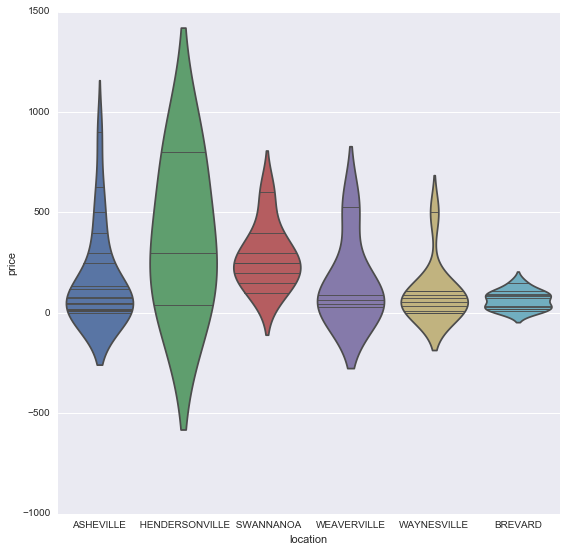

In [34]:
plt.figure(figsize=(9,9))
sns.violinplot(x="location", y="price", data=popular_locations, scale="width", inner="stick")
plt.show();

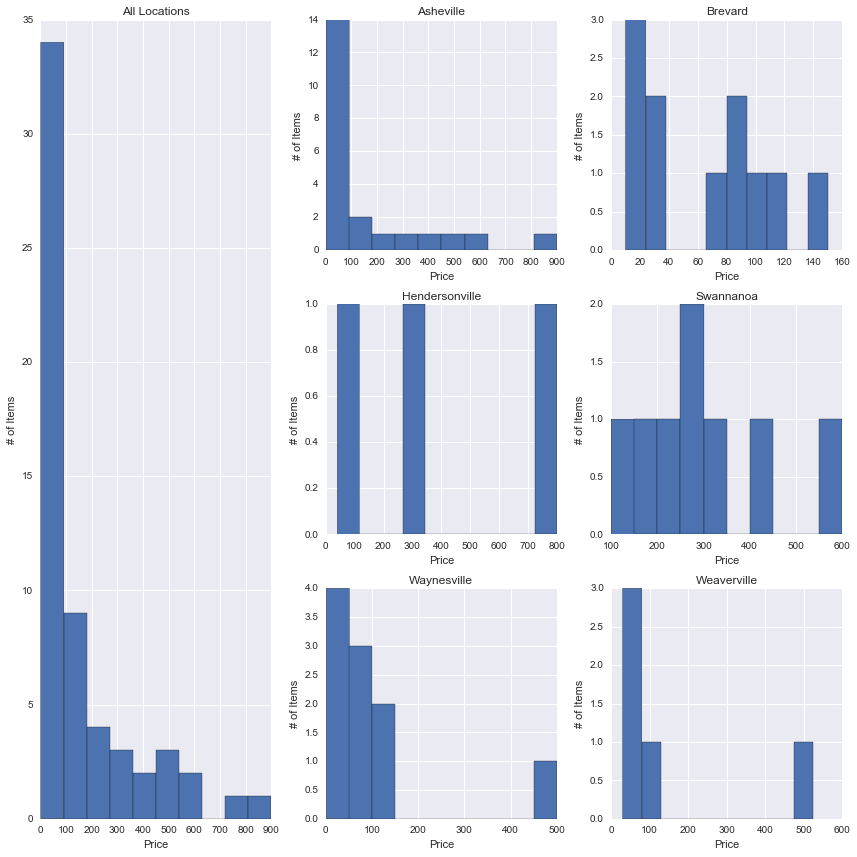

In [37]:
fig = plt.figure(figsize=(12,12)) #opening a figure

#first subplot
ax1 = fig.add_subplot(1,3,1) #first subplot
ax1.hist(popular_locations.price.values)
plt.title("All Locations")
plt.ylabel("# of Items")
plt.xlabel("Price")

ax2 = fig.add_subplot(3,3,2)
ax2.hist(popular_locations[popular_locations.location.str.contains('ASHEVILLE')]['price'])
plt.title("Asheville")
plt.ylabel("# of Items")
plt.xlabel("Price")
ax3 = fig.add_subplot(3,3,3)
ax3.hist(popular_locations[popular_locations.location.str.contains('BREVARD')]['price'])
plt.title("Brevard")
plt.ylabel("# of Items")
plt.xlabel("Price")
ax4 = fig.add_subplot(3,3,5)
ax4.hist(popular_locations[popular_locations.location.str.contains('HENDERSONVILLE')]['price'])
plt.title("Hendersonville")
plt.ylabel("# of Items")
plt.xlabel("Price")
ax5 = fig.add_subplot(3,3,6)
ax5.hist(popular_locations[popular_locations.location.str.contains('SWANNANOA')]['price'])
plt.title("Swannanoa")
plt.ylabel("# of Items")
plt.xlabel("Price")
ax6 = fig.add_subplot(3,3,8)
ax6.hist(popular_locations[popular_locations.location.str.contains('WAYNESVILLE')]['price'])
plt.title("Waynesville")
plt.ylabel("# of Items")
plt.xlabel("Price")
ax7 = fig.add_subplot(3,3,9)
ax7.hist(popular_locations[popular_locations.location.str.contains('WEAVERVILLE')]['price'])
plt.title("Weaverville")
plt.ylabel("# of Items")
plt.xlabel("Price")

plt.tight_layout()
plt.show();

We can see from the numerical analysis and visualizations that we can be confident $500.00 will allow us to purchase the majority of items in the primary locations around the Asheville area.

Now that we've taken a deep dive into the data, let's take a step back and take one last quick glimpse of the raw used items scraped from Craigslist on April 25th.

In [36]:
postings

,location,name,price
Apr 25,MARION,1968 Camaro,26500.0
Apr 25,ASHEVILLE,2015 Harley Davidson Softail Slim with Warrent...,12899.0
Apr 25,ARDEN,2006 SUBARU BAJA TURBO,9900.0
Apr 25,ASHEVILLE,MUST SELL!! NEED SPACE! 2013 Polaris RZR 800S LE,9499.0
Apr 25,ASHEVILLE,2007 Ford Mustang - Excellent Condition,8500.0
Apr 25,HENDERSONVILLE,Ford explorer,7500.0
Apr 25,GREENVILLE,2017 ktm 250sx BRAND NEW NEVER CRANKED,7500.0
Apr 25,HAYWOOD,98 Jeep Wrangler,7000.0
Apr 25,ARDEN,2003 HONDA ELEMENT AWD,5900.0
Apr 25,ARDEN,2006 HONDA ACCORD,5900.0


In conclusion, this sample size snapshot of used items in the area illuminates that there are plenty of pickings for any vehicle enthusiast.  If someone is hunting for a deal that outside of purchasing a used vehicle, they can expect to pay around $500.00 or less. Free items are seperated in another area of Craigslist so it will require its own separate search another time. One man's junk is another man's treasure and happy hunting!